In [3]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#reading a csv file into a pandas dataframe
candy = pd.read_csv("candy-data.csv")
candy.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [5]:
#renaming some of the headers so it is easier to work with them
candy.rename(columns={'peanutyalmondy':'nutty',
                          'pluribus':'multi',
                         'crispedricewafer':'crispy'}, 
                 inplace=True)
candy.head()

,competitorname,chocolate,fruity,caramel,nutty,nougat,crispy,hard,bar,multi,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
candy['competitorname'].unique()

array(['100 Grand', '3 Musketeers', 'One dime', 'One quarter',
       'Air Heads', 'Almond Joy', 'Baby Ruth', 'Boston Baked Beans',
       'Candy Corn', 'Caramel Apple Pops', 'Charleston Chew',
       'Chewey Lemonhead Fruit Mix', 'Chiclets', 'Dots', 'Dum Dums',
       'Fruit Chews', 'Fun Dip', 'Gobstopper', 'Haribo Gold Bears',
       'Haribo Happy Cola', 'Haribo Sour Bears', 'Haribo Twin Snakes',
       'HersheyÕs Kisses', 'HersheyÕs Krackel',
       'HersheyÕs Milk Chocolate', 'HersheyÕs Special Dark', 'Jawbusters',
       'Junior Mints', 'Kit Kat', 'Laffy Taffy', 'Lemonhead',
       'Lifesavers big ring gummies', 'Peanut butter M&MÕs', 'M&MÕs',
       'Mike & Ike', 'Milk Duds', 'Milky Way', 'Milky Way Midnight',
       'Milky Way Simply Caramel', 'Mounds', 'Mr Good Bar', 'Nerds',
       'Nestle Butterfinger', 'Nestle Crunch', 'Nik L Nip', 'Now & Later',
       'Payday', 'Peanut M&Ms', 'Pixie Sticks', 'Pop Rocks', 'Red vines',
       'ReeseÕs Miniatures', 'ReeseÕs Peanut Butter cup'

In [7]:
#some names of the candy have this 'Õ' symbol which I would like to substitute with '.
candy['competitorname'] = candy['competitorname'].str.replace('Õ', "'") 

In [8]:
#checking if that was fixed
candy['competitorname'].unique()

array(['100 Grand', '3 Musketeers', 'One dime', 'One quarter',
       'Air Heads', 'Almond Joy', 'Baby Ruth', 'Boston Baked Beans',
       'Candy Corn', 'Caramel Apple Pops', 'Charleston Chew',
       'Chewey Lemonhead Fruit Mix', 'Chiclets', 'Dots', 'Dum Dums',
       'Fruit Chews', 'Fun Dip', 'Gobstopper', 'Haribo Gold Bears',
       'Haribo Happy Cola', 'Haribo Sour Bears', 'Haribo Twin Snakes',
       "Hershey's Kisses", "Hershey's Krackel",
       "Hershey's Milk Chocolate", "Hershey's Special Dark", 'Jawbusters',
       'Junior Mints', 'Kit Kat', 'Laffy Taffy', 'Lemonhead',
       'Lifesavers big ring gummies', "Peanut butter M&M's", "M&M's",
       'Mike & Ike', 'Milk Duds', 'Milky Way', 'Milky Way Midnight',
       'Milky Way Simply Caramel', 'Mounds', 'Mr Good Bar', 'Nerds',
       'Nestle Butterfinger', 'Nestle Crunch', 'Nik L Nip', 'Now & Later',
       'Payday', 'Peanut M&Ms', 'Pixie Sticks', 'Pop Rocks', 'Red vines',
       "Reese's Miniatures", "Reese's Peanut Butter cup"

In [9]:
#checking how many unqie values are in each column. Most of the columns (except for 4) have 2 unique values which are 0 and 1. 
uniqueValues = candy.nunique()
uniqueValues

competitorname    85
chocolate          2
fruity             2
caramel            2
nutty              2
nougat             2
crispy             2
hard               2
bar                2
multi              2
sugarpercent      34
pricepercent      29
winpercent        85
dtype: int64

In [10]:
#making sure the numerical data is in the same format. The three columns with numerical data provide us with information about the percentage or percentile.
#I would like it to be in the same format. 
candy['sugarpercent']=round(candy['sugarpercent'],2)
candy['pricepercent']=round(candy['pricepercent'],2)
candy['winpercent']=round(candy['winpercent']/100,2)
candy.head()

,competitorname,chocolate,fruity,caramel,nutty,nougat,crispy,hard,bar,multi,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,0.67
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,0.68
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,0.32
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,0.46
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52


In [11]:
#generating desctiptive statistics
print("Describe Data")
print("-"*125)
print(candy.describe())
#summarizing categorical data
print("-"*125)
print("Summarized Data")
print("-"*125)
print(candy.describe(include=['O']))

Describe Data
-----------------------------------------------------------------------------------------------------------------------------
       chocolate     fruity    caramel      nutty     nougat     crispy  \
count  85.000000  85.000000  85.000000  85.000000  85.000000  85.000000   
mean    0.435294   0.447059   0.164706   0.164706   0.082353   0.082353   
std     0.498738   0.500140   0.373116   0.373116   0.276533   0.276533   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     1.000000   1.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

            hard        bar      multi  sugarpercent  pricepercent  winpercent  
count  85.000000  85.000000  85.000000     85.000000     85.000000   85.000000  
mean    0.176471   0.2

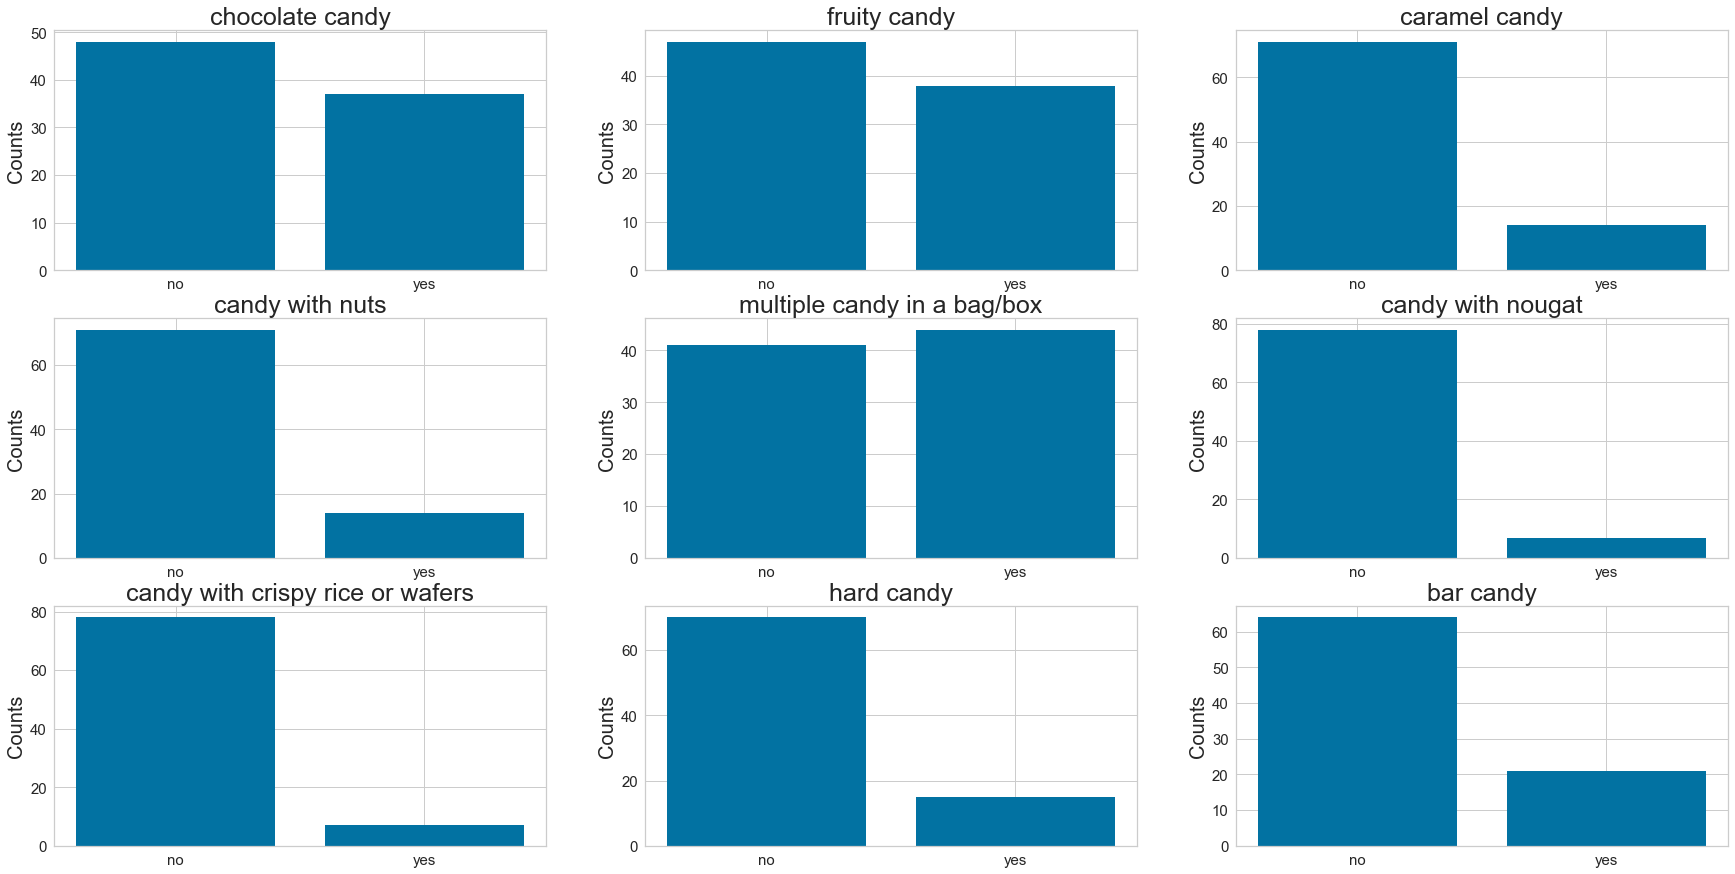

In [12]:
#%matplotlib inline
#setting up the figure size
plt.rcParams['figure.figsize'] = (30, 15)
#making subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)
# making the data about chocolate candy read to feed into the visulizer
X_chocolate = candy.replace({'chocolate': {1: 'yes', 0: 'no'}}).groupby('chocolate').size().reset_index(name='Counts')['chocolate']
Y_chocolate = candy.replace({'chocolate': {1: 'yes', 0: 'no'}}).groupby('chocolate').size().reset_index(name='Counts')['Counts']
# making the first bar plot
axes[0, 0].bar(X_chocolate, Y_chocolate)
axes[0, 0].set_title('chocolate candy', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
# make the data about fruity candy read to feed into the visulizer
X_fruity = candy.replace({'fruity': {1: 'yes', 0: 'no'}}).groupby('fruity').size().reset_index(name='Counts')['fruity']
Y_fruity = candy.replace({'fruity': {1: 'yes', 0: 'no'}}).groupby('fruity').size().reset_index(name='Counts')['Counts']
# making the second  bar plot
axes[0, 1].bar(X_fruity, Y_fruity)
axes[0, 1].set_title('fruity candy', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# making the data about candy with caramel read to feed into the visulizer
X_caramel = candy.replace({'caramel': {1: 'yes', 0: 'no'}}).groupby('caramel').size().reset_index(name='Counts')['caramel']
Y_caramel = candy.replace({'caramel': {1: 'yes', 0: 'no'}}).groupby('caramel').size().reset_index(name='Counts')['Counts']
# making the 3rd bar plot
axes[0, 2].bar(X_caramel, Y_caramel)
axes[0, 2].set_title('caramel candy', fontsize=25)
axes[0, 2].set_ylabel('Counts', fontsize=20)
axes[0, 2].tick_params(axis='both', labelsize=15)

# making the data about nutty candy read to feed into the visulizer
X_nutty = candy.replace({'nutty': {1: 'yes', 0: 'no'}}).groupby('nutty').size().reset_index(name='Counts')['nutty']
Y_nutty = candy.replace({'nutty': {1: 'yes', 0: 'no'}}).groupby('nutty').size().reset_index(name='Counts')['Counts']
# making the 4th bar plot
axes[1, 0].bar(X_nutty, Y_nutty)
axes[1, 0].set_title('candy with nuts', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)


# making the data about candy with nougat read to feed into the visulizer
X_nougat = candy.replace({'nougat': {1: 'yes', 0: 'no'}}).groupby('nougat').size().reset_index(name='Counts')['nougat']
Y_nougat = candy.replace({'nougat': {1: 'yes', 0: 'no'}}).groupby('nougat').size().reset_index(name='Counts')['Counts']
# making the 5th bar plot
axes[1, 2].bar(X_nougat, Y_nougat)
axes[1, 2].set_title('candy with nougat', fontsize=25)
axes[1, 2].set_ylabel('Counts', fontsize=20)
axes[1, 2].tick_params(axis='both', labelsize=15)

# making the data about candy with crisped rice and wafers read to feed into the visulizer
X_crispy = candy.replace({'crispy': {1: 'yes', 0: 'no'}}).groupby('crispy').size().reset_index(name='Counts')['crispy']
Y_crispy = candy.replace({'crispy': {1: 'yes', 0: 'no'}}).groupby('crispy').size().reset_index(name='Counts')['Counts']
# making the 6th bar plot
axes[2, 0].bar(X_crispy, Y_crispy)
axes[2, 0].set_title('candy with crispy rice or wafers', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)

# making the data about hard candy read to feed into the visulizer
X_hard = candy.replace({'hard': {1: 'yes', 0: 'no'}}).groupby('hard').size().reset_index(name='Counts')['hard']
Y_hard = candy.replace({'hard': {1: 'yes', 0: 'no'}}).groupby('hard').size().reset_index(name='Counts')['Counts']
# making the 7th bar plot
axes[2, 1].bar(X_hard, Y_hard)
axes[2, 1].set_title('hard candy', fontsize=25)
axes[2, 1].set_ylabel('Counts', fontsize=20)
axes[2, 1].tick_params(axis='both', labelsize=15)

# making the data about bar candy with read to feed into the visulizer
X_bar= candy.replace({'bar': {1: 'yes', 0: 'no'}}).groupby('bar').size().reset_index(name='Counts')['bar']
Y_bar= candy.replace({'bar': {1: 'yes', 0: 'no'}}).groupby('bar').size().reset_index(name='Counts')['Counts']
# making the 8th bar plot
axes[2, 2].bar(X_bar, Y_bar)
axes[2, 2].set_title('bar candy', fontsize=25)
axes[2, 2].set_ylabel('Counts', fontsize=20)
axes[2, 2].tick_params(axis='both', labelsize=15)

# making the data about candy with multiple candy in the bag/box read to feed into the visulizer
X_multi = candy.replace({'multi': {1: 'yes', 0: 'no'}}).groupby('multi').size().reset_index(name='Counts')['multi']
Y_multi= candy.replace({'multi': {1: 'yes', 0: 'no'}}).groupby('multi').size().reset_index(name='Counts')['Counts']
#making the 9th bar plot
axes[1, 1].bar(X_multi, Y_multi)
axes[1, 1].set_title('multiple candy in a bag/box', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()


                          Conclusions about popular Halloween candy from the graph:
                                            
1. There is more Halloween candy that is not chocolate candy.
2. There is more Halloween candy that is not fruity candy.
3. There is more Halloween candy that is not caramel candy.
4. There is more Halloween candy that is without nuts.
5. There is more Halloween candy that has multiple candy in a box/bag.
6. There is more Halloween candy without nougat.
7. There is more Halloween candy without crisped rice or wafers.
8. There is more Halloween candy that is not hard candy.
9. There is more Halloween candy that is not bar candy.

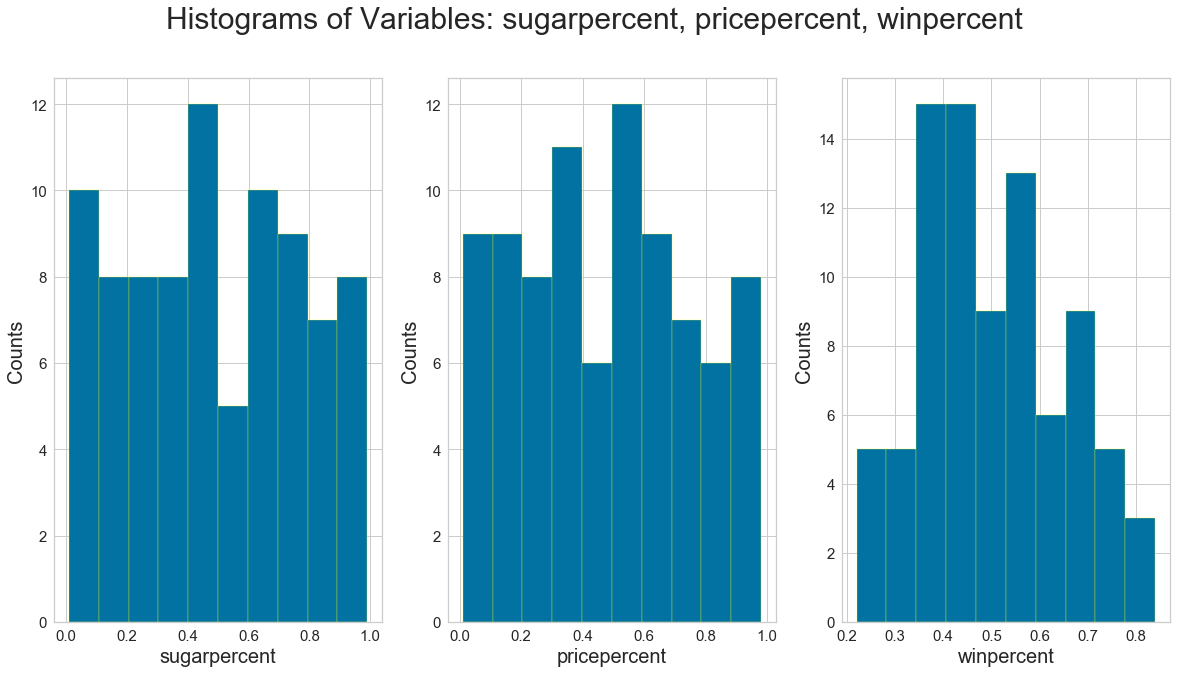

In [13]:
# setting up the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# making subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)
# Specifying the features of interest
num_features = ['sugarpercent', 'pricepercent', 'winpercent']
#setting xaxes
xaxes = num_features
#setting yaxes
yaxes = ['Counts', 'Counts', 'Counts']
#creating histograms
fig.suptitle('Histograms of Variables: sugarpercent, pricepercent, winpercent', fontsize=30)
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(candy[num_features[idx]].dropna(), bins=10, EdgeColor='yellow')
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

                             Conclusions about popular Halloween candy from the histograms:
                             
The most common percentile of sugar that candy falls under within the data set is from 40 to 50.
The most common unit price percentile compared to the rest of the set is from 50 to 60.
The most common win percentage according to 269,000 matchups is from 40 to 45.

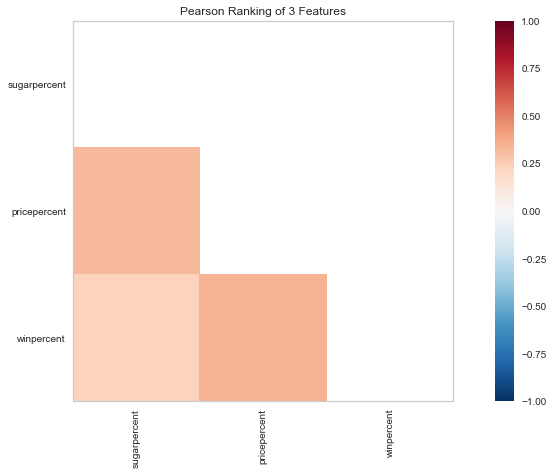

In [14]:
#Pearson Ranking coefficients
#%matplotlib inline
#setting the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# importing the package for visulization of the correlation
from yellowbrick.features import Rank2D
# extract the numpy arrays from the data frame
X = candy[num_features].values

# instantiating the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
# Fitting the data to the visualizer
visualizer.fit(X) 
# Transforming the data
visualizer.transform(X)  
# Draw/show/poof the data; saving png file
visualizer.poof(outpath="d://pcoords1.png") 
plt.show()


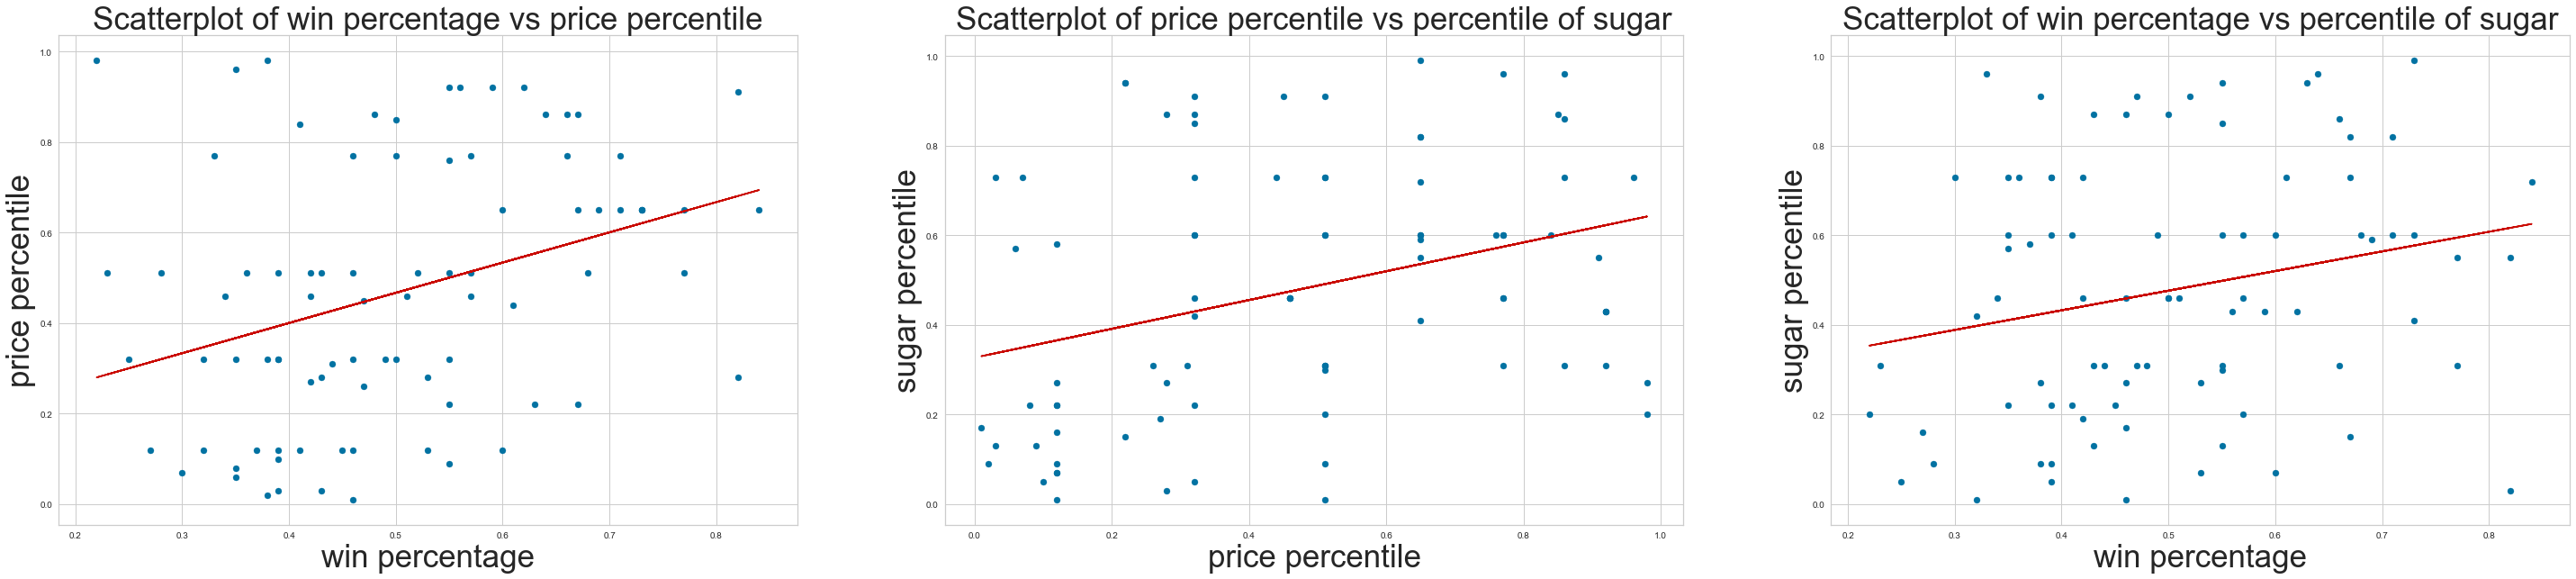

In [15]:
winpercent = candy['winpercent']
pricepercent = candy['pricepercent']
sugarpercent = candy['sugarpercent']
#function for the line of best fit
def scatterplotwithline(X,y):
    denominator = X.dot(X) - X.mean() *X.sum()
    m=(X.dot(y) - y.mean() *X.sum())/denominator
    b = (y.mean() *X.dot(X) - X.mean()*X.dot(y))/denominator
    y_pred = m*X + b
    return y_pred
#setting up the figure size
plt.rcParams['figure.figsize'] = (50, 10)
fig, axs = plt.subplots(nrows = 1, ncols =  3)
#scatterplot for winpercent vs pricepercent
axs[0].scatter(winpercent, pricepercent)
axs[0].set_title('Scatterplot of win percentage vs price percentile',  fontsize=35)
axs[0].set_xlabel('win percentage', fontsize=35)
axs[0].set_ylabel('price percentile', fontsize=35)
#plotting line of best fit
axs[0].plot(winpercent,scatterplotwithline(winpercent,pricepercent),'r')

#scatterplot for pricepercent vs sugarpercentile
axs[1].scatter(pricepercent, sugarpercent)
axs[1].set_title('Scatterplot of price percentile vs percentile of sugar',  fontsize=35)
axs[1].set_xlabel('price percentile', fontsize=35)
axs[1].set_ylabel('sugar percentile', fontsize=35)
#plotting line of best fit
axs[1].plot(pricepercent,scatterplotwithline(pricepercent,sugarpercent),'r')

#scatterplot for winpercent vs sugarpercentile
axs[2].scatter(winpercent, sugarpercent)
axs[2].set_title('Scatterplot of win percentage vs percentile of sugar',  fontsize=35)
axs[2].set_xlabel('win percentage',  fontsize=35)
axs[2].set_ylabel('sugar percentile',  fontsize=35)
#plotting line of best fit
axs[2].plot(winpercent,scatterplotwithline(winpercent,sugarpercent),'r')
plt.show();

In [16]:
import numpy as np
arraycandy = np.corrcoef(winpercent, pricepercent)
arraycandy1 = np.corrcoef(pricepercent, sugarpercent)
arraycandy2 = np.corrcoef(winpercent, sugarpercent)
print('Correlation coefficient for variables winpercent and pricepercent: ', round(arraycandy.item(0,1),2))
print('Correlation coefficient for variables sugarpercent and pricepercent: ', round(arraycandy1.item(0,1),2))
print('Correlation coefficient for variables sugarpercent and winpercent: ', round(arraycandy2.item(0,1),2))

Correlation coefficient for variables winpercent and pricepercent:  0.34
Correlation coefficient for variables sugarpercent and pricepercent:  0.33
Correlation coefficient for variables sugarpercent and winpercent:  0.23


After considering the results from the Pearson's ranking chart, looking at the scatterplots, and the computed correlation coefficients we can tell that the correlation between the numerical variables is positive but not very high. The higest correlation is between the overall win percentage and the unit price percentile.

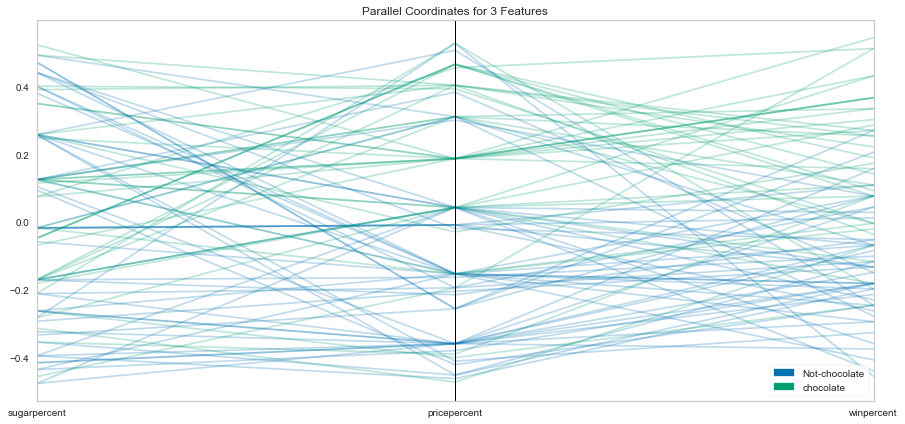

In [17]:
#Comparing variables against chocolate  and not chocolate
#setting up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setting up the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_colorblind')

# importing necessary packages
from yellowbrick.features import ParallelCoordinates
# Specifying the features of interest and the classes of the target
classes = ['Not-chocolate', 'chocolate']
num_features = ['sugarpercent', 'pricepercent', 'winpercent']

# copying data to a new dataframe
data_norm = candy.copy()
# normalizing data to 0-1 range
for feature in num_features:
    data_norm[feature] = (candy[feature] - candy[feature].mean()) / (candy[feature].max() - candy[feature].min())

# Extracting the numpy arrays from the data frame
X = data_norm[num_features].values
y = candy.chocolate.values

# Instantiating the visualizer
# Instantiating the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fitting the data to the visualizer
visualizer.transform(X)   # Transforming the data
visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data; saving as png
plt.show();

                                  The Parrellel Coordinates graph showed:
1. Most of the candy that falls under the higher sugar percentile is chocolate candy.
2. Most of the candy that falls under higher price per unit percentile is chocolate candy
3. The most popular candy is chocolate candy

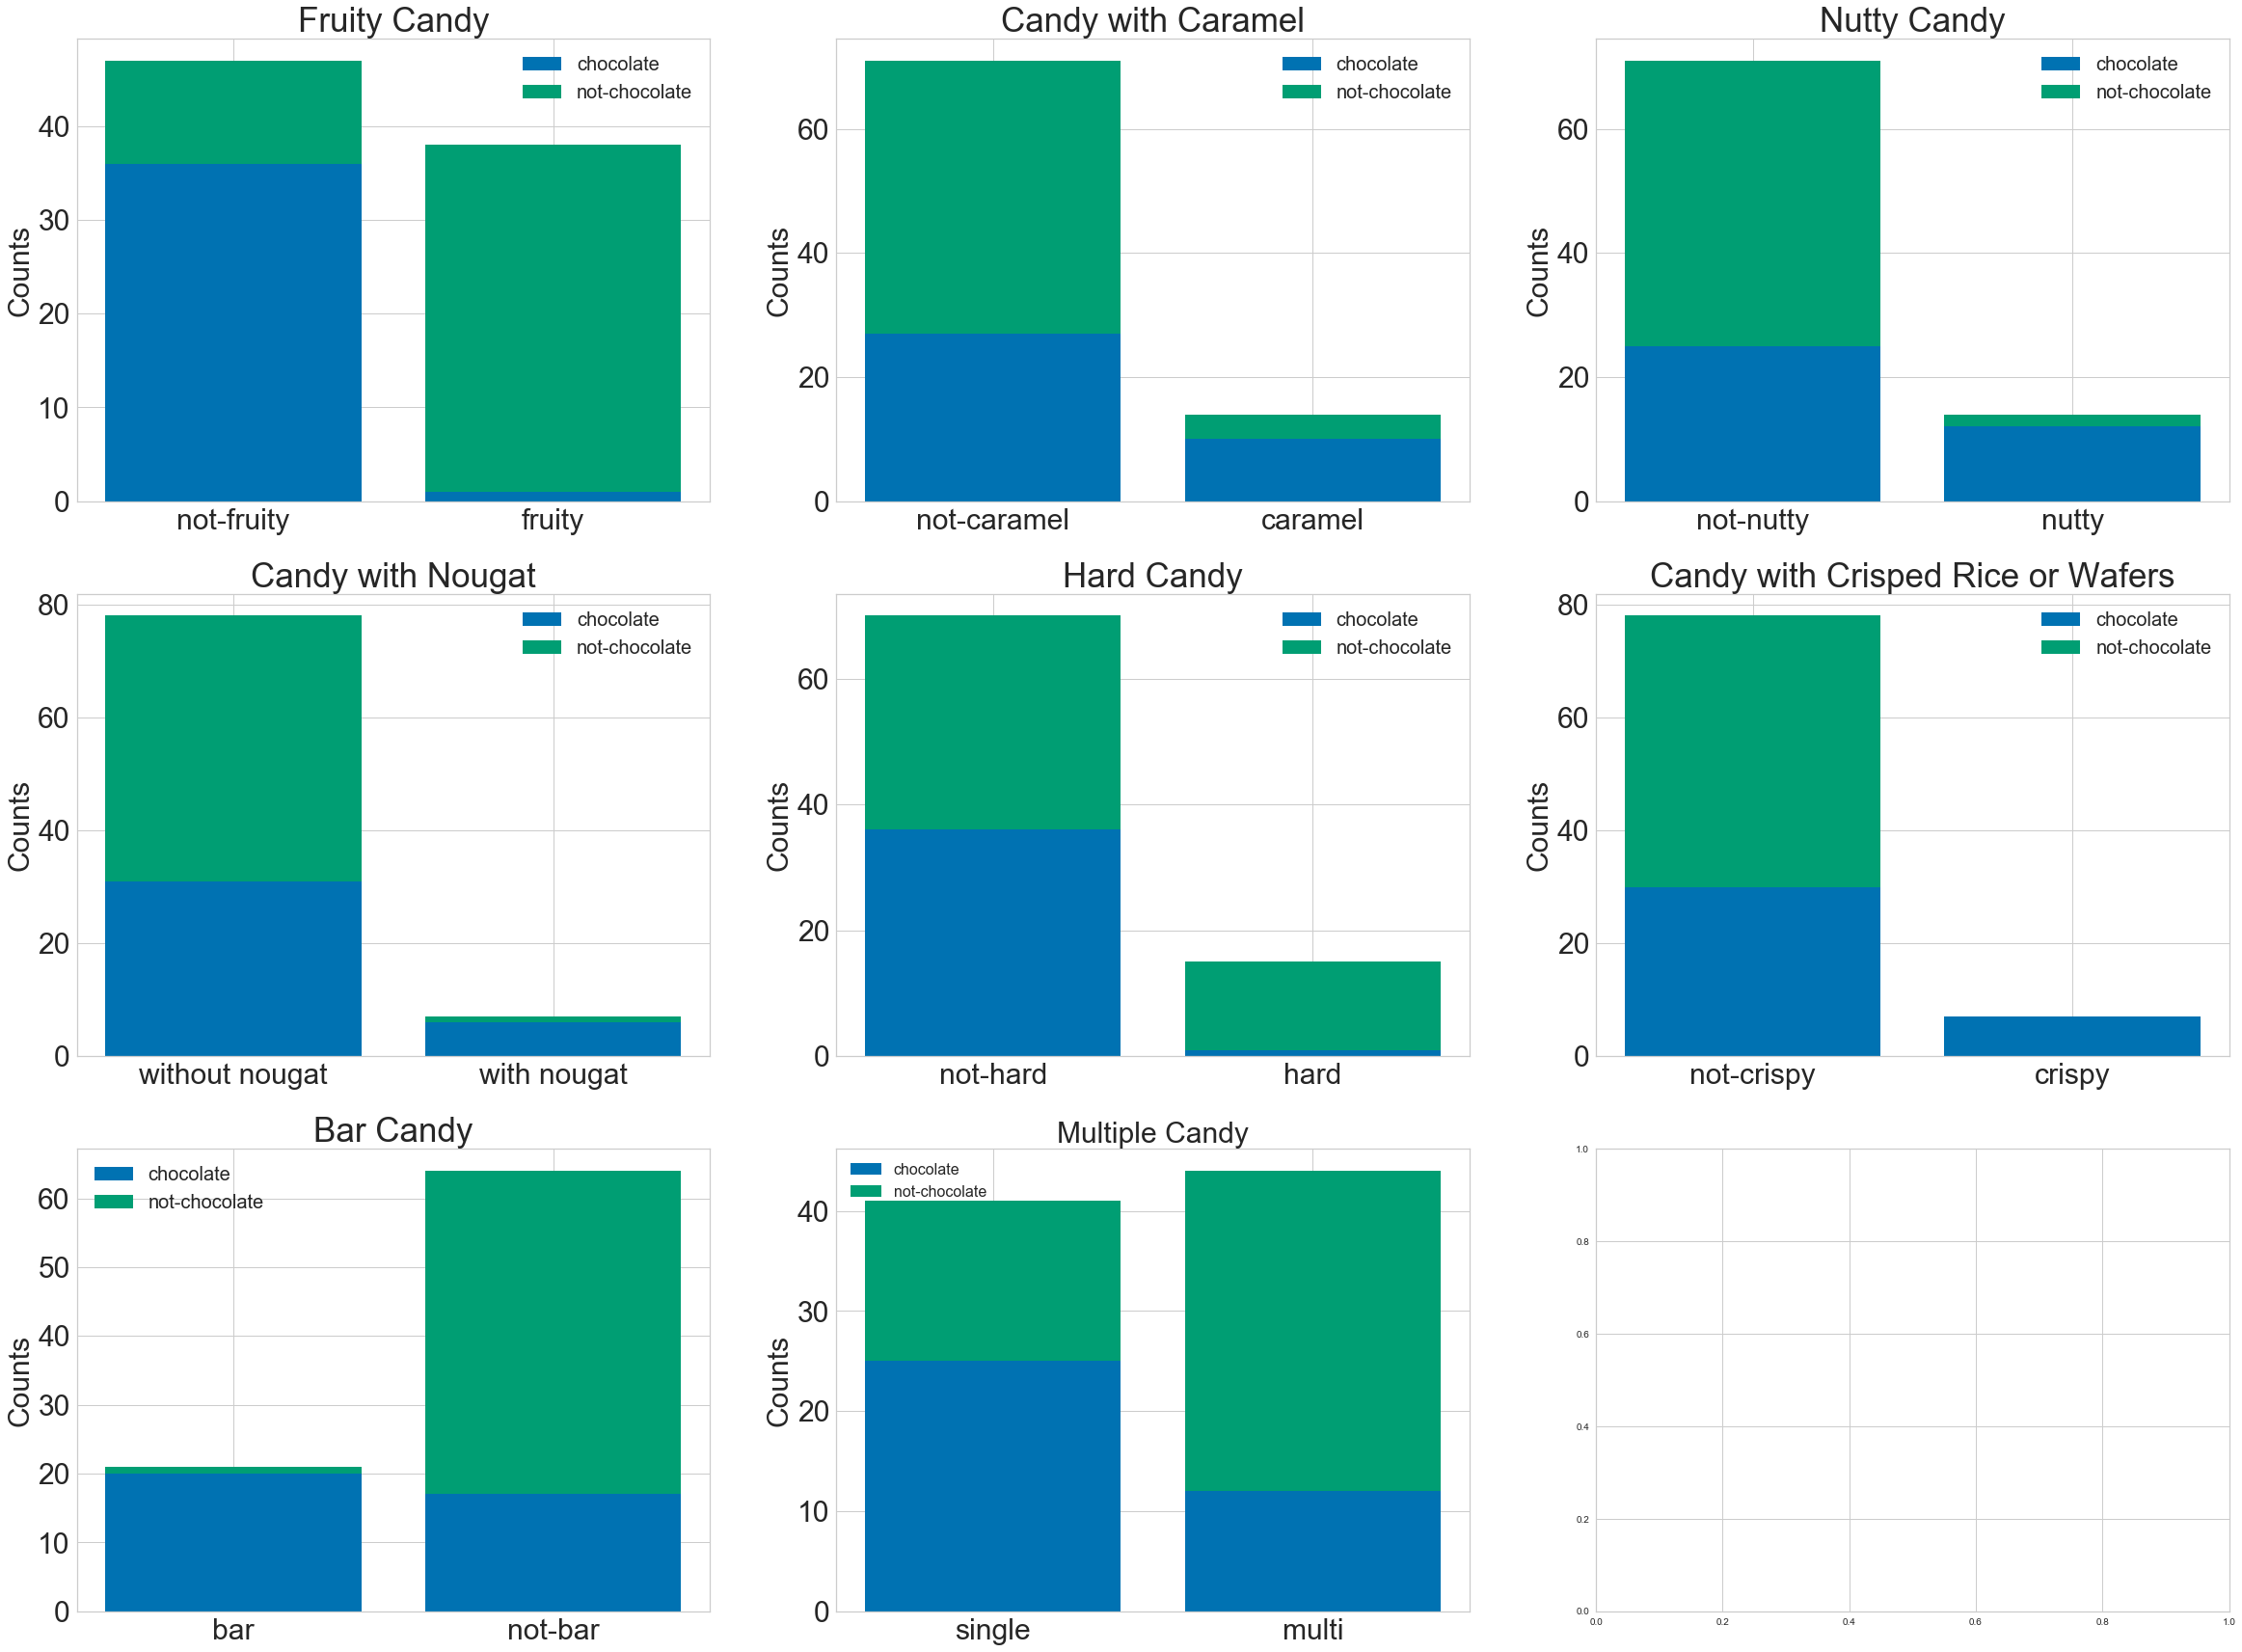

In [18]:
#creating stacked bar charts to compare chocolate/not chocolate based on other variables
#converting 1 and 0 to text which will help with explanantions of the graphs
#%matplotlib inline
candy1 = candy.copy()
candy1['fruity'].replace({
                1: 'fruity',
                0: 'not-fruity'
            },inplace=True)
candy1['caramel'].replace({
                1: 'caramel',
                0: 'not-caramel'
            },inplace=True)
candy1['nutty'].replace({
                1: 'nutty',
                0: 'not-nutty'
            },inplace=True)
candy1['nougat'].replace({
                1: 'with nougat',
                0: 'without nougat'
            }, inplace=True)
candy1['crispy'].replace({
                1: 'crispy',
                0: 'not-crispy'
            }, inplace=True)
candy1['hard'].replace({
                1: 'hard',
                0: 'not-hard'
            }, inplace=True)
candy1['bar'].replace({
                1: 'bar',
                0: 'not-bar'
            }, inplace=True)
candy1['multi'].replace({
                1: 'multi',
                0: 'single'
            }, inplace=True)

#setting a figure
plt.rcParams['figure.figsize'] = (40,30 )

# making subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)

# making the data about fruity candy read to feed into the visulizer
Fruity_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==1]['fruity'].value_counts()
Fruity_not_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==0]['fruity'].value_counts()
Fruity_not_chocolate = Fruity_not_chocolate.reindex(index = Fruity_chocolate.index)
# making the stacked bar plot
p1 = axes[0, 0].bar(Fruity_chocolate.index, Fruity_chocolate.values)
p2 = axes[0, 0].bar(Fruity_not_chocolate.index, Fruity_not_chocolate.values, bottom=Fruity_chocolate.values)
axes[0, 0].set_title('Fruity Candy', fontsize=35)
axes[0, 0].set_ylabel('Counts', fontsize=30)
axes[0, 0].tick_params(axis='both', labelsize=30)
axes[0, 0].legend((p1[0], p2[0]), ('chocolate', 'not-chocolate'), fontsize = 20)

# making the data about candy with caramel read to feed into the visulizer
Caramel_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==1]['caramel'].value_counts()
Caramel_not_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==0]['caramel'].value_counts()
Caramel_not_chocolate = Caramel_not_chocolate.reindex(index = Caramel_chocolate.index)
# making the stacked bar plot
p3 = axes[0, 1].bar(Caramel_chocolate.index, Caramel_chocolate.values)
p4 = axes[0, 1].bar(Caramel_not_chocolate.index, Caramel_not_chocolate.values, bottom=Caramel_chocolate.values)
axes[0, 1].set_title('Candy with Caramel', fontsize=35)
axes[0, 1].set_ylabel('Counts', fontsize=30)
axes[0, 1].tick_params(axis='both', labelsize=30)
axes[0, 1].legend((p3[0], p4[0]), ('chocolate', 'not-chocolate'), fontsize = 20)


# making the data about candy with nuts read to feed into the visulizer
Nutty_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==1]['nutty'].value_counts()
Nutty_not_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==0]['nutty'].value_counts()
Nutty_not_chocolate = Nutty_not_chocolate.reindex(index = Nutty_chocolate.index)
# making the stacked bar plot
p5 = axes[0, 2].bar(Nutty_chocolate.index, Nutty_chocolate.values)
p6 = axes[0, 2].bar(Nutty_not_chocolate.index, Nutty_not_chocolate.values, bottom=Nutty_chocolate.values)
axes[0, 2].set_title('Nutty Candy', fontsize=35)
axes[0, 2].set_ylabel('Counts', fontsize=30)
axes[0, 2].tick_params(axis='both', labelsize=30)
axes[0, 2].legend((p5[0], p6[0]), ('chocolate', 'not-chocolate'), fontsize = 20)

# making the data about candy with nougat read to feed into the visulizer
Nougat_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==1]['nougat'].value_counts()
Nougat_not_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==0]['nougat'].value_counts()
Nougat_not_chocolate = Nougat_not_chocolate.reindex(index = Nougat_chocolate.index)
# making the stacked bar plot
p7 = axes[1, 0].bar(Nougat_chocolate.index, Nougat_chocolate.values)
p8 = axes[1, 0].bar(Nougat_not_chocolate.index, Nougat_not_chocolate.values, bottom=Nougat_chocolate.values)
axes[1, 0].set_title('Candy with Nougat', fontsize=35)
axes[1, 0].set_ylabel('Counts', fontsize=30)
axes[1, 0].tick_params(axis='both', labelsize=30)
axes[1, 0].legend((p7[0], p8[0]), ('chocolate', 'not-chocolate'), fontsize = 20)

# making the data about candy with crisped rice and wafers read to feed into the visulizer
Crispy_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==1]['crispy'].value_counts()
Crispy_not_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==0]['crispy'].value_counts()
Crispy_not_chocolate = Crispy_not_chocolate.reindex(index = Crispy_chocolate.index)
# making the stacked bar plot
p9 = axes[1, 2].bar(Crispy_chocolate.index, Crispy_chocolate.values)
p10 = axes[1, 2].bar(Crispy_not_chocolate.index, Crispy_not_chocolate.values, bottom=Crispy_chocolate.values)
axes[1, 2].set_title('Candy with Crisped Rice or Wafers', fontsize=35)
axes[1, 2].set_ylabel('Counts', fontsize=30)
axes[1, 2].tick_params(axis='both', labelsize=30)
axes[1, 2].legend((p9[0], p10[0]), ('chocolate', 'not-chocolate'), fontsize = 20)
                     

# making the data about hard candy read to feed into the visulizer
Hard_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==1]['hard'].value_counts()
Hard_not_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==0]['hard'].value_counts()
Hard_not_chocolate = Hard_not_chocolate.reindex(index = Hard_chocolate.index)
# making the stacked bar plot
p11 = axes[1, 1].bar(Hard_chocolate.index, Hard_chocolate.values)
p12 = axes[1, 1].bar(Hard_not_chocolate.index, Hard_not_chocolate.values, bottom=Hard_chocolate.values)
axes[1, 1].set_title('Hard Candy', fontsize=35)
axes[1, 1].set_ylabel('Counts', fontsize=30)
axes[1, 1].tick_params(axis='both', labelsize=30)
axes[1, 1].legend((p11[0], p12[0]), ('chocolate', 'not-chocolate'), fontsize = 20)

# making the data about bar candy read to feed into the visulizer
Bar_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==1]['bar'].value_counts()
Bar_not_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==0]['bar'].value_counts()
Bar_not_chocolate = Bar_not_chocolate.reindex(index = Bar_chocolate.index)
# making the stacked bar plot
p13 = axes[2, 0].bar(Bar_chocolate.index, Bar_chocolate.values)
p14 = axes[2, 0].bar(Bar_not_chocolate.index, Bar_not_chocolate.values, bottom=Bar_chocolate.values)
axes[2, 0].set_title('Bar Candy', fontsize=35)
axes[2, 0].set_ylabel('Counts', fontsize=30)
axes[2, 0].tick_params(axis='both', labelsize=30)
axes[2, 0].legend((p13[0], p14[0]), ('chocolate', 'not-chocolate'), fontsize = 20)

# making the data about candy with single or many candies in a bag or box read to feed into the visulizer
Multi_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==1]['multi'].value_counts()
Multi_not_chocolate = candy1.replace({'chocolate': {1: 'chocolate', 0: 'not-chocolate'}})[candy1['chocolate']==0]['multi'].value_counts()
Multi_not_chocolate = Multi_not_chocolate.reindex(index = Multi_chocolate.index)
# making the stacked bar plot
p15 = axes[2, 1].bar(Multi_chocolate.index, Multi_chocolate.values)
p16 = axes[2, 1].bar(Multi_not_chocolate.index, Multi_not_chocolate.values, bottom=Multi_chocolate.values)
axes[2, 1].set_title('Multiple Candy', fontsize=30)
axes[2, 1].set_ylabel('Counts', fontsize=30)
axes[2, 1].tick_params(axis='both', labelsize=30)
axes[2, 1].legend((p15[0], p16[0]), ('chocolate', 'not-chocolate'), fontsize = 16, loc='upper left')
plt.show()


                                            Results of the stacked bar graphs:
                                            
1. Most of the fruity candy is not chocolate candy.
2. Most of the candy with caramel is chocolate candy.
3. Most of the candy with nuts is chocolate candy.
4. Most of the candy with nougat is chocolate candy.
5. Most of the hard candy is not chocolate, and candy that is not hard is about 50% chocolate and 50% not chocolate.
6. Most of the crispy candy (the graph even shows all of it) is chocolate.
7. Most of the bar candy is chocolate.
8. Most of the candy with multiple items in the bag/box is not chocolate.

In [19]:
from itertools import cycle, islice
#extracting data about popular candy and sorting it
popularity = candy[['competitorname','winpercent']].sort_values(by='winpercent')
#getting the top and the least popular candy into one dataframe
newcandy = pd.concat([popularity.head(5),popularity.tail(5)],axis=0)
#adding colors
my_colors = list(islice(cycle(['orchid', 'orchid', 'orchid', 'orchid', 'orchid', 'forestgreen','forestgreen','forestgreen','forestgreen','forestgreen']), None, len(newcandy)))

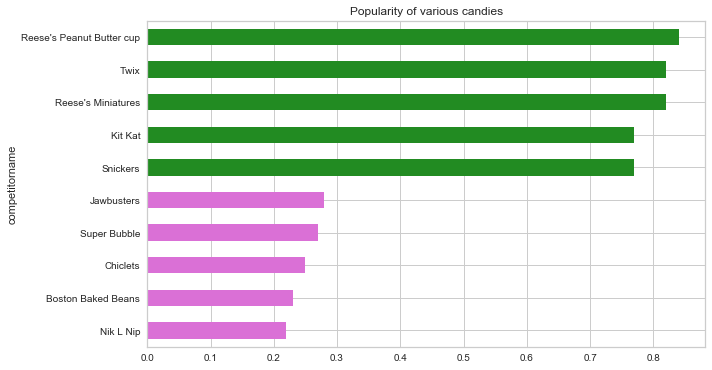

In [21]:
#plotting popularity hotizontal bar graph
newcandy.plot(x='competitorname',y='winpercent',kind='barh', title='Popularity of various candies',sort_columns=True,figsize = (10,6),legend=False, color=my_colors);

The list of the top 5 popular Halloween candy:

1. Reese's Peanut Butter cup	
2. Reese's Miniatures	
3. Twix
4. Kit Kat	
5. Snickers

The list of 5 least popular Halloween candy:

1. Nik L Nip (the least popular Halloween candy)
2. Boston Baked Beans
3. Chiclets
4. Super Bubble
5. Jawbusters

In [22]:
#checking the number of missing values
candy.info()
#we can see there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   competitorname  85 non-null     object 
 1   chocolate       85 non-null     int64  
 2   fruity          85 non-null     int64  
 3   caramel         85 non-null     int64  
 4   nutty           85 non-null     int64  
 5   nougat          85 non-null     int64  
 6   crispy          85 non-null     int64  
 7   hard            85 non-null     int64  
 8   bar             85 non-null     int64  
 9   multi           85 non-null     int64  
 10  sugarpercent    85 non-null     float64
 11  pricepercent    85 non-null     float64
 12  winpercent      85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [23]:
#the data set already has binary categorical variables in the form of 1 and 0, 
#so I will leave it like this and won't be changing anything for these variables.
candy.head()

,competitorname,chocolate,fruity,caramel,nutty,nougat,crispy,hard,bar,multi,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,0.67
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,0.68
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,0.32
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,0.46
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52


In [24]:
#removing the feature "competitorname" since it won't provide any useful information for our analysis
candy.drop(['competitorname'], axis=1, inplace=True)
candy.head()

,chocolate,fruity,caramel,nutty,nougat,crispy,hard,bar,multi,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.73,0.86,0.67
1,1,0,0,0,1,0,0,1,0,0.60,0.51,0.68
2,0,0,0,0,0,0,0,0,0,0.01,0.12,0.32
3,0,0,0,0,0,0,0,0,0,0.01,0.51,0.46
4,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52


In [30]:
#converting the DataFrame object into a Numpy array to speed up the computation in the future
array = candy.values
#separating the features
features = array[:,1:12]
#target feature
y = array[:,0]

In [82]:
# Import necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [83]:
# Feature selection using Recursive Feature Elimination (with Logistic Regression). I was considering other feature selection methods
#but since my data set has a target vector 1 -chocolate, 0 - not chocolate, and a mix of binary categorical variables already 
#in the form of 1/0 and a few continuous variables, I didn't think using ANOVA, or Ridge would work well with this data. 
model = LogisticRegression()
# From what I read it is recommended to have at least 10 to 15 observations per feature.
#So, if we have 5 features, the number could be good for a dataset of about 75 observations. I have 85 observations total, which is not a big sample.
#Just to be safe and not to overfit the model I decided to select 4 features considering how small my sample is.
rfe = RFE(model, 4)
fit = rfe.fit(features, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
print('The score of the underlying estimator after the selection of features', round(rfe.score(features,y),2))

Num Features: 4
Selected Features: [ True False False False False False  True False False  True  True]
Feature Ranking: [1 8 4 7 2 3 1 5 6 1 1]
The score of the underlying estimator after the selection of features 0.92


In [84]:
print('The selected features are fruity, bar, pricepercent and winpercent')

The selected features are fruity, bar, pricepercent and winpercent


In [85]:
#Creating a dataset that can be used for train and validation data splitting.
#Using the features that were selected above with the help of Recursive Feature Elimination with Logistic Regression.
#I will proceed with Logistic Regression as a model of choice and the features selected for it to see how accurate this model is.
data_X = candy[['fruity','bar','winpercent','pricepercent']]
#create a target dataset that can be used for training and validation data 
#first of all I would like to check how balanced the classes of the target vector are
print("balance of the classes of the tagret feature:\n", candy['chocolate'].value_counts());
print("\nThe balance is 56/44, which indicates good balance of classes")
data_y = candy.replace({'chocolate': {1: 'chocolate', 0: 'Not_chocolate'}})['chocolate']


balance of the classes of the tagret feature:
 0    48
1    37
Name: chocolate, dtype: int64

The balance is 56/44, which indicates good balance of classes


In [86]:
# import packages needed for splitting the data into train and test
from sklearn.model_selection import train_test_split
# splitting the data and 
X_train, X_val, y_train, y_val = train_test_split(data_X, data_y, test_size =0.3, random_state=11)

# number of samples in each set
print("Number of samples in training set: ", X_train.shape[0])
print("NUmber of samples in validation set:", X_val.shape[0])

# Chcocolate and not-chocolate number of observations
print('\n')
print('The number of chocolate and Not_chocolate in the training set:')
print(y_train.value_counts())

print('\n')
print('The number of chocolate and and Not_chocolate in the validation set:')
print(y_val.value_counts())


Number of samples in training set:  59
NUmber of samples in validation set: 26


The number of chocolate and Not_chocolate in the training set:
Not_chocolate    33
chocolate        26
Name: chocolate, dtype: int64


The number of chocolate and and Not_chocolate in the validation set:
Not_chocolate    15
chocolate        11
Name: chocolate, dtype: int64


Score:  85.0 %


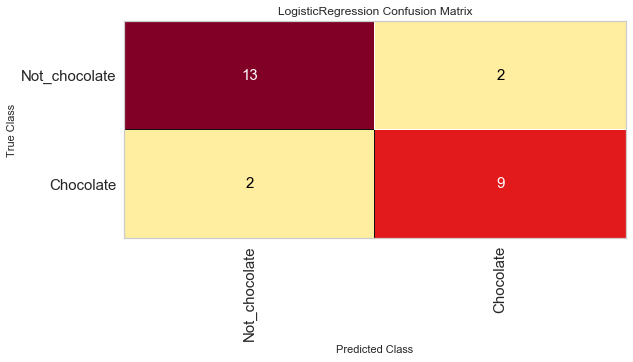

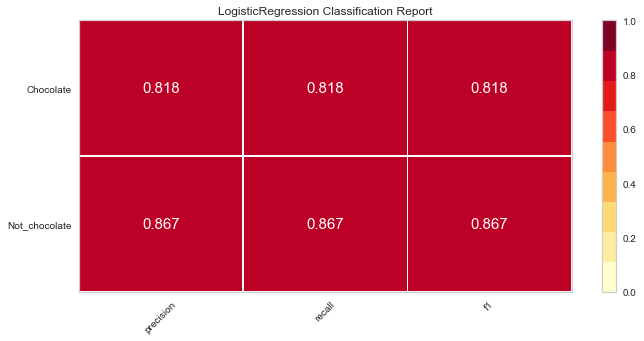

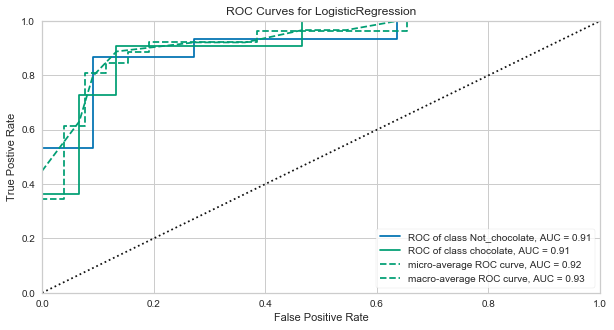

In [87]:
#importing the packages needed for Logistic Regression and its evaluation
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiating the classification model-Logistic Regression
model = LogisticRegression()
plt.rcParams['figure.figsize'] = (9, 4)
plt.rcParams['font.size'] = 15
#passing the model into the ConfusionMatrix visualizer
classes = ['Not_chocolate','Chocolate']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# fitting the passed model. 
cm.fit(X_train, y_train)

#Obtaining the score for model validation
print('Score: ',round(cm.score(X_val, y_val)*100,0),"%")

# formatting the fontsize of the labels 
for label in cm.ax.texts:
    label.set_size(15)
#displaying the results
cm.poof()

# setting the size of the figure and the font size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 15

# instantiating the visualizer: Precision, Recall and F1. Classification report
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fitting the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluating the model on the validation data
g = visualizer.poof()

#Instantiating the visualizer and passing the model to get the validation with ROCAUC
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)#fitting the training data to the visualizer
visualizer.score(X_val, y_val) #evaluating the model with validation data

g = visualizer.poof()


In [88]:
#using GridSearch to select optimal hyperparameters for the model 
from sklearn.model_selection import GridSearchCV
#specifying a subset of penalties 
penalty = ['l1', 'l2']
# specifying a subset of C values
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# specifying a subset of solvers (algorithms used in the optimization)
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  solver=solver)
#using grid search to get the best parameters
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s


Best Params:  {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    2.1s finished


Score:  92.0 %


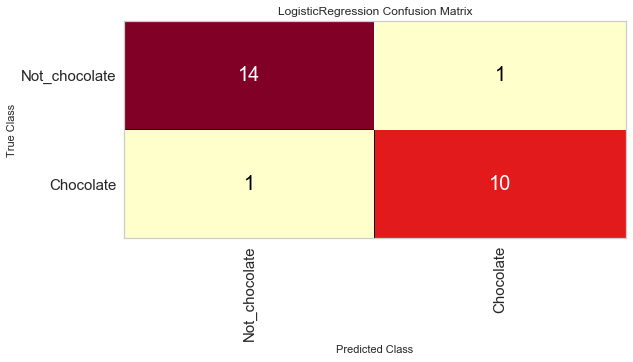

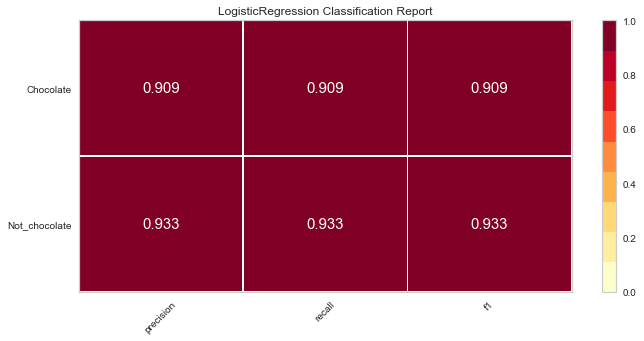

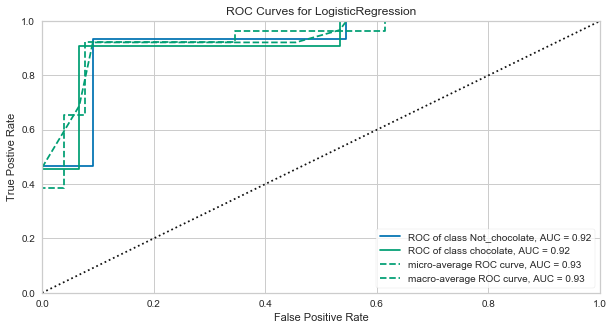

In [89]:
# Instantiating the classification model-Logistic Regression with the best parameters
model = LogisticRegression(penalty='l1', C=1000, solver='liblinear')
plt.rcParams['figure.figsize'] = (9, 4)
plt.rcParams['font.size'] = 15
#passing the model into the ConfusionMatrix visualizer
classes = ['Not_chocolate','Chocolate']
cm = ConfusionMatrix(model, classes=classes, percent=False)

# fitting the passed model. 
cm.fit(X_train, y_train)

print('Score: ',round(cm.score(X_val, y_val)*100,0),"%")
# formatting the fontsize of the labels 
for label in cm.ax.texts:
    label.set_size(20)
#displaying the results
cm.poof()

# setting the size of the figure and the font size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 15

# instantiating the visualizer: Precision, Recall and F1. Classification report
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)  # Fitting the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluating the model on the validation data
g = visualizer.poof()

#Instantiating the visualizer and passing the model to get the validation with ROCAUC
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)#fitting the training data to the visualizer
visualizer.score(X_val, y_val) #evaluating the model with validation data

g = visualizer.poof()

In [31]:
#importing the necessary library to use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Feature selection using Recursive Feature Elimination (with RandomForestClassifier).
#The 4 most effecient features are the same as those identified with RFE with Logistic Regression 
#Since the features are the same I will follow the similar steps as with the logistic regression 
#when building and training the model
modelRF=RandomForestClassifier()
RFERF=RFE(modelRF,4)
fit=RFERF.fit(features, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 4
Selected Features: [ True False False False False False  True False False  True  True]
Feature Ranking: [1 8 4 7 6 5 1 3 2 1 1]


In [91]:
#trying random forest classifier
randomf_model = RandomForestClassifier().fit(X_train, y_train)


In [92]:
from sklearn.metrics import accuracy_score
#displaying the accuracy score
y_pred = randomf_model.predict(X_val)
round(accuracy_score(y_val, y_pred),3)

0.885

Score:  88.0 %


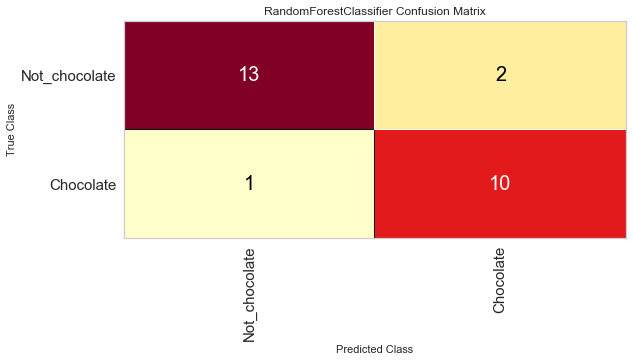

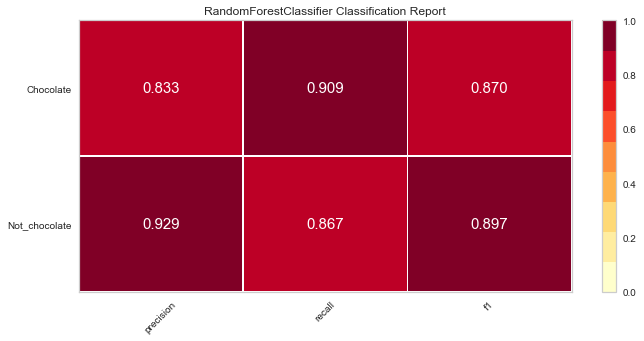

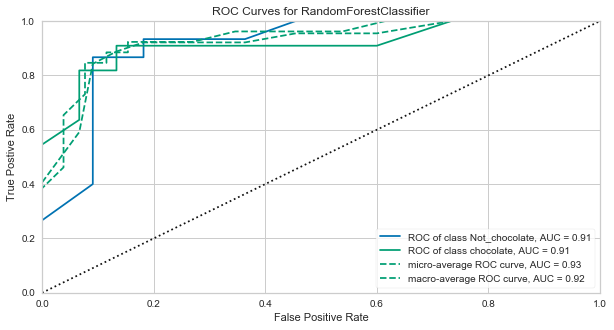

In [93]:
#setting the figure size
plt.rcParams['figure.figsize'] = (9, 4)
plt.rcParams['font.size'] = 15
#passing the model into the ConfusionMatrix visualizer
classes = ['Not_chocolate','Chocolate']
cm1 = ConfusionMatrix(randomf_model, classes=classes, percent=False)

# fitting the passed model. 
cm1.fit(X_train, y_train)

print('Score: ',round(cm1.score(X_val, y_val)*100,0),"%")
# formatting the fontsize of the labels 
for label in cm1.ax.texts:
    label.set_size(20)
#displaying the results
cm1.poof()

# setting the size of the figure and the font size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 15

# instantiating the visualizer: Precision, Recall and F1. Classification report
visualizer = ClassificationReport(randomf_model, classes=classes)
visualizer.fit(X_train, y_train)  # Fitting the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluating the model on the validation data
g = visualizer.poof()

#Instantiating the visualizer and passing the model to get the validation with ROCAUC
visualizer = ROCAUC(randomf_model)

visualizer.fit(X_train, y_train)#fitting the training data to the visualizer
visualizer.score(X_val, y_val) #evaluating the model with validation data

g = visualizer.poof()

In [94]:
#providing a set of possible hyperparameters that could be used to tune the model
randomf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [2,5,10,500,1000],
            "min_samples_split": [2,5,10,20]}

In [95]:
#setting the GridSearchCV
randomf_model = RandomForestClassifier()

randomf_cv_model = GridSearchCV(randomf_model, 
                           randomf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [96]:
#running the search
randomf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 255 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 646 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 1613 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2316 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  1.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [97]:
#best parameters for RandomForest classifier
print("Best Parameters: " + str(randomf_cv_model.best_params_))

Best Parameters: {'max_depth': 2, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 10}


In [99]:
#tuning the model with the best parameters
randomf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 2, 
                                  min_samples_split = 20,
                                  n_estimators = 500)

randomf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
#accuracy score 
y_pred = randomf_tuned.predict(X_val)
round(accuracy_score(y_val, y_pred),3)

0.885

Score:  88.0 %


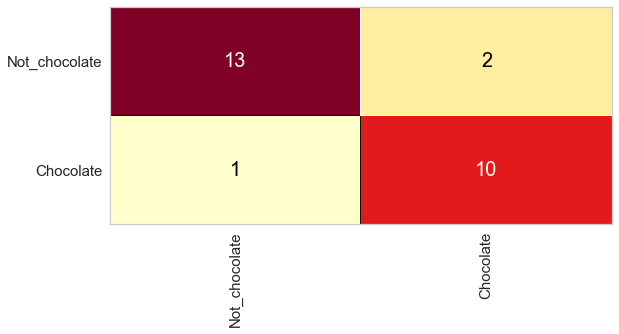

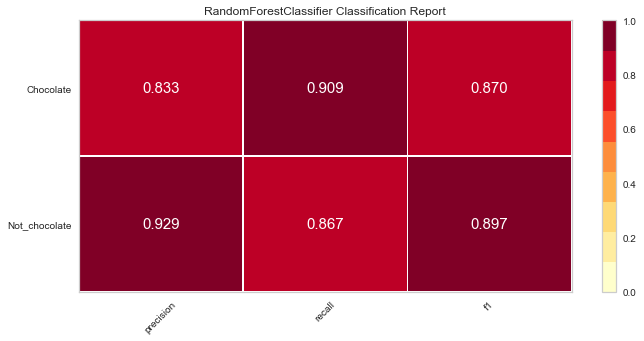

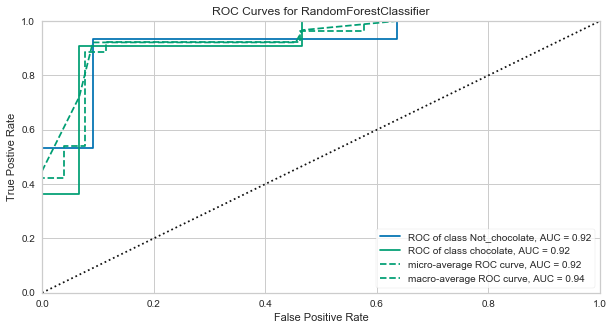

In [101]:
#setting up the figure size
plt.rcParams['figure.figsize'] = (9, 4)
plt.rcParams['font.size'] = 15
#passing the model into the ConfusionMatrix visualizer
classes = ['Not_chocolate','Chocolate']
cm2 = ConfusionMatrix(randomf_tuned, classes=classes, percent=False)

# fitting the passed model. 
cm2.fit(X_train, y_train)

print('Score: ',round(cm2.score(X_val, y_val)*100,0),"%")
# formatting the fontsize of the labels 
for label in cm2.ax.texts:
    label.set_size(20)
#displaying the results
cm1.poof()

# setting the size of the figure and the font size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 15

# instantiating the visualizer: Precision, Recall and F1. Classification report
visualizer = ClassificationReport(randomf_tuned, classes=classes)
visualizer.fit(X_train, y_train)  # Fitting the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluating the model on the validation data
g = visualizer.poof()

#Instantiating the visualizer and passing the model to get the validation with ROCAUC
visualizer = ROCAUC(randomf_tuned)

visualizer.fit(X_train, y_train)#fitting the training data to the visualizer
visualizer.score(X_val, y_val) #evaluating the model with validation data

g = visualizer.poof()